In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product
from tqdm.notebook import tqdm, trange
# import pulp

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
brakes = pd.read_csv("../data/brakes.csv")
gearbox = pd.read_csv("../data/gearbox.csv")
rear_wing = pd.read_csv("../data/rear_wing.csv")
front_wing = pd.read_csv("../data/front_wing.csv")
suspension = pd.read_csv("../data/suspension.csv")
engine = pd.read_csv("../data/engine.csv")

In [4]:
parts_list = [brakes, gearbox, rear_wing, front_wing, suspension, engine]
all_parts = pd.concat(parts_list)
trait_list = ["Power", "Aero", "Grip", "Reliability", "Pit Time"]

In [5]:
index_list = [list(brakes.index), list(gearbox.index), list(rear_wing.index),
              list(front_wing.index), list(suspension.index), list(engine.index)]
index_combinations = product(*index_list)
tunes = []
da_tunes = []

In [6]:
for combination in tqdm(index_combinations):
    tune_table = []
    part_names = []
    
    for i in range(len(combination)):
        part_numbers = parts_list[i].loc[combination[i], trait_list]
        part_name = parts_list[i].loc[combination[i], "Part"]
        tune_table.append(part_numbers)
        part_names.append(part_name)
    
    tune = pd.DataFrame(tune_table).sum()
    results = {'Parts': part_names,
               'Power': tune[0],
               'Aero': tune[1],
               'Grip': tune[2],
               'Reliability': tune[3],
               'Pit_Time': tune[4]}
    
    tunes.append(results)
    
tunes = pd.DataFrame(tunes)
tunes.to_csv("../data/current_tunes.csv", index=False)

0it [00:00, ?it/s]

# Use notebook from here on if looking for tunes

In [7]:
setups = pd.read_csv("../data/current_tunes.csv")

### Specific tunes/setups

In [8]:
# This formula comes from TR The Flash's spreadsheet pinned on Discord
setups['setup_MM_value'] = 3*(setups['Power']+setups['Aero']+setups['Grip']+setups['Reliability']) + 90*(6-setups['Pit_Time'])

# Overall strength of the car setup
setups['PAGR'] = setups['Power']+setups['Aero']+setups['Grip']+setups['Reliability']

# The presumed two most important stats for the car setup
setups['PG'] = setups['Power']+setups['Grip']

In [9]:
# Filtering setups to only include those above a certain percentile in overall stats
f = setups['PAGR'] > np.percentile(setups['PAGR'], 99.99)

# Displaying table and sorting in descending order of overall stats
setups.loc[f].sort_values(by='PAGR', ascending=False)

,Parts,Power,Aero,Grip,Reliability,Pit_Time,setup_MM_value,PAGR,PG
2801,"['Clamp', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'Destroyer']",65.0,68.0,82.0,60.0,3.59,1041.9,275.0,147.0
36415,"['Slow Motion', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'Destroyer']",63.0,71.0,79.0,62.0,3.52,1048.2,275.0,142.0
3830,"['Clamp', 'The Buffer', 'The Branch', 'Padlock', 'The Hold', 'Destroyer']",61.0,68.0,81.0,64.0,3.58,1039.8,274.0,142.0
37444,"['Slow Motion', 'The Buffer', 'The Branch', 'Padlock', 'The Hold', 'Destroyer']",59.0,71.0,78.0,66.0,3.51,1046.1,274.0,137.0
53222,"['The Anvil', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'Destroyer']",63.0,71.0,63.0,76.0,3.52,1042.2,273.0,126.0
2800,"['Clamp', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'Powerplant']",70.0,61.0,81.0,60.0,3.59,1032.9,272.0,151.0
2803,"['Clamp', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'The Bond']",58.0,63.0,90.0,61.0,3.68,1024.8,272.0,148.0
3487,"['Clamp', 'The Buffer', 'The Strake', 'Padlock', 'The Hold', 'Destroyer']",59.0,68.0,88.0,57.0,3.55,1036.5,272.0,147.0
36414,"['Slow Motion', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'Powerplant']",68.0,64.0,78.0,62.0,3.52,1039.2,272.0,146.0
36417,"['Slow Motion', 'The Buffer', 'C.X.2', 'Padlock', 'The Hold', 'The Bond']",56.0,66.0,87.0,63.0,3.61,1031.1,272.0,143.0


# Drivers

In [10]:
drivers = pd.read_csv("../data/current_drivers.csv")
drivers['wet_quali'] = drivers['Overtaking']+drivers['Defending']+drivers['Fuel']+drivers['Tyre']+drivers['Rain']
drivers['dry_quali'] = drivers['Overtaking']+drivers['Defending']+drivers['Fuel']+drivers['Tyre']
drivers['wet_race'] = drivers['Overtaking']+drivers['Defending']+drivers['Consistency']+drivers['Fuel']+drivers['Tyre']+drivers['Rain']
drivers['dry_race'] = drivers['Overtaking']+drivers['Defending']+drivers['Consistency']+drivers['Fuel']+drivers['Tyre']
drivers['conservators'] = drivers['Fuel']+drivers['Tyre']

In [29]:
g = drivers['Consistency'] > np.percentile(drivers['Consistency'], 50)
drivers.loc[g].sort_values(by='dry_race', ascending=False)

,Drivers,Overtaking,Defending,Consistency,Fuel,Tyre,Rain,wet_quali,dry_quali,wet_race,dry_race,conservators
6,Sainz,99,113,119,85,106,92,495,403,614,522,191
14,Giovinazzi,81,88,116,108,95,102,474,372,590,488,203
7,Russell,78,85,97,91,110,103,467,364,564,461,201
9,Alonso,91,105,97,70,84,77,427,350,524,447,154
0,Hamilton,100,87,93,81,75,106,449,343,542,436,156
4,Bottas,80,86,92,98,73,67,404,337,496,429,171
2,Ricciardo,95,70,101,76,82,88,411,323,512,424,158
12,Norris,95,82,88,70,63,76,386,310,474,398,133
5,Perez,63,70,91,84,77,97,391,294,482,385,161
15,Ocon,67,61,92,80,73,86,367,281,459,373,153


#### Testing idea of weighting driver stats according to CursedbyFlame's opinion

In [12]:
# drivers = pd.read_csv("../data/current_drivers.csv")
# drivers['for_duels'] = (80*drivers['Overtaking']+30*drivers['Consistency']+60*drivers['Fuel']+70*drivers['Tyre'])/240
# drivers['dry_GP'] = (80*drivers['Overtaking']+60*drivers['Consistency']+60*drivers['Fuel']+70*drivers['Tyre'])/270
# drivers['wet_GP'] = (60*drivers['Overtaking']+60*drivers['Consistency']+70*drivers['Fuel']+80*drivers['Tyre']+100*drivers['Rain'])/370

In [13]:
# drivers.sort_values(by='for_duels', ascending=False)

Difference between PAG vs. PAGR?

In [14]:
PAG = pd.read_csv("../data/test_max_PAG.csv")
PAGR = pd.read_csv("../data/test_max_PAGR.csv")

In [15]:
PAGR

,Race,quali_Russell_10,pos_Russell_10,delta_Russell_10,quali_Sainz_8,pos_Sainz_8,delta_Sainz_8,delta_drivers_total,delta_setup_total,delta_matchmaking,points
0,1,6,1,5,5,2,3,7,-1,-1,47
1,2,5,2,3,3,1,2,7,0,1,47
2,3,5,6,-1,4,4,0,22,-8,-1,40
3,4,5,3,2,3,2,1,29,16,-2,45
4,5,2,2,0,4,1,3,29,-9,-2,47
5,6,6,5,1,5,1,4,29,-9,-2,44
6,7,3,1,2,9,7,2,29,-9,-2,42
7,8,3,3,0,5,4,1,-8,15,0,43
8,9,4,2,2,10,5,5,7,-2,-1,43
9,10,6,2,4,4,1,3,97,24,129,47


For Russell's qualifying?

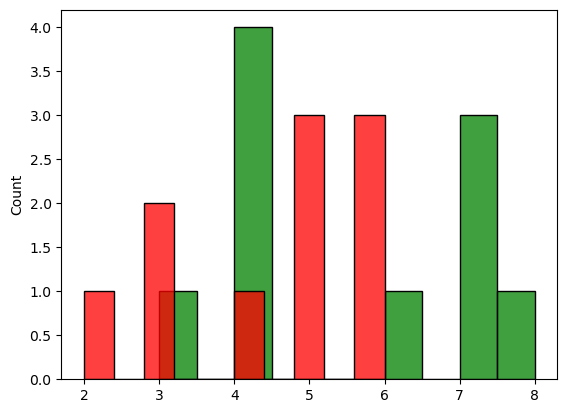

In [16]:
sns.histplot(list(PAG['quali_Russell_10']), bins=10, color='g')
sns.histplot(list(PAGR['quali_Russell_10']), bins=10, color='r')
plt.show()

Sainz?

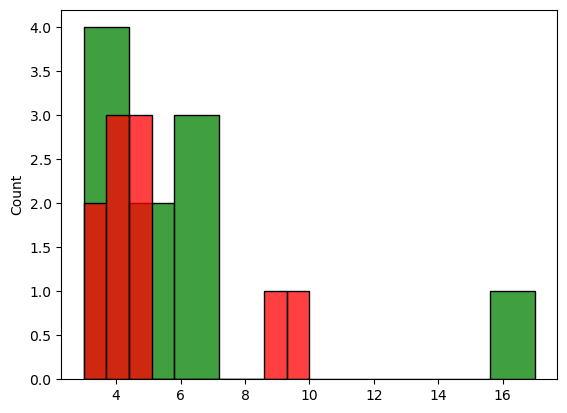

In [17]:
sns.histplot(list(PAG['quali_Sainz_8']), bins=10, color='g')
sns.histplot(list(PAGR['quali_Sainz_8']), bins=10, color='r')
plt.show()

What about points?

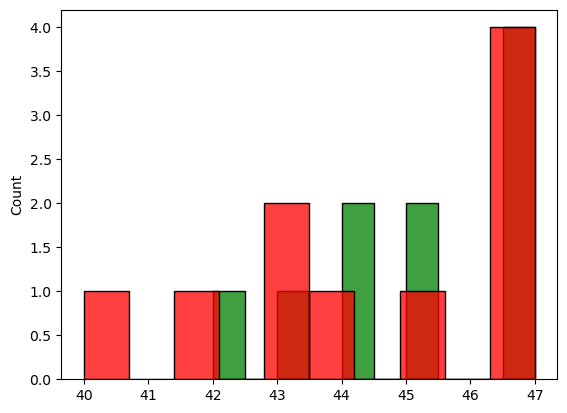

In [18]:
sns.histplot(list(PAG['points']), bins=10, color='g')
sns.histplot(list(PAGR['points']), bins=10, color='r')
plt.show()

Let's hear it for finishing positions! RUSSELL

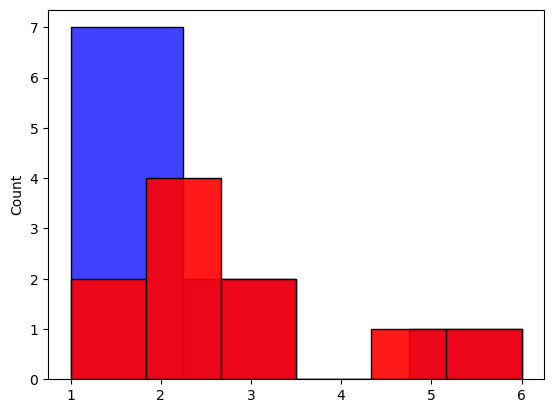

In [19]:
sns.histplot(list(PAG['pos_Russell_10']), bins='fd', color='b')
sns.histplot(list(PAGR['pos_Russell_10']), bins='fd', color='r', alpha=0.9)
plt.show()

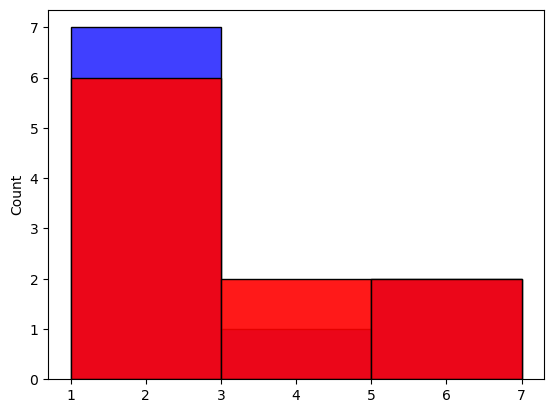

In [20]:
sns.histplot(list(PAG['pos_Sainz_8']), bins='fd', color='b')
sns.histplot(list(PAGR['pos_Sainz_8']), bins='fd', color='r', alpha=0.9)
plt.show()

Russell vs. Hamilton for dry races!

In [21]:
PAGR_HAM = pd.read_csv("../data/test_max_PAGR_HAM.csv")

In [22]:
PAGR_HAM

,Race,quali_Hamilton_6,pos_Hamilton_6,delta_Hamilton_6,quali_Sainz_8,pos_Sainz_8,delta_Sainz_8,delta_drivers_total,delta_setup_total,delta_matchmaking,points
0,1,8,2,6,4,1,3,98,20,151,47
1,2,5,1,4,3,3,0,18,-3,0,46
2,3,4,1,3,9,5,4,-7,5,2,44
3,4,4,2,2,10,8,2,-15,8,1,40
4,5,7,4,3,3,6,-3,18,-2,1,40
5,6,12,1,11,3,2,1,18,-3,0,47
6,7,8,8,0,6,2,4,23,-4,1,40
7,8,7,2,5,3,1,2,23,-4,1,47
8,9,5,2,3,2,3,-1,18,5,2,45
9,10,9,3,6,4,1,3,15,7,-1,46


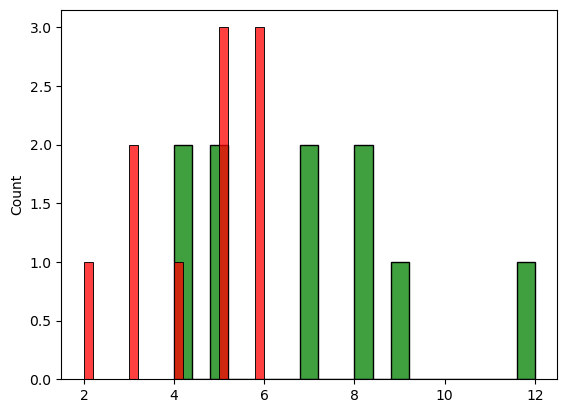

In [23]:
sns.histplot(list(PAGR_HAM['quali_Hamilton_6']), bins=20, color='g')
sns.histplot(list(PAGR['quali_Russell_10']), bins=20, color='r')
plt.show()

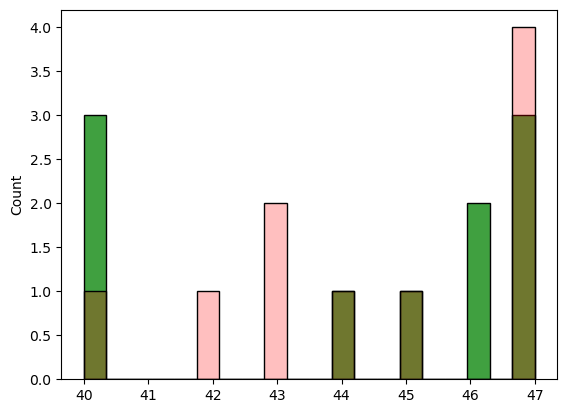

In [24]:
sns.histplot(list(PAGR_HAM['points']), bins=20, color='g')
sns.histplot(list(PAGR['points']), bins=20, color='r', alpha=0.25)
plt.show()

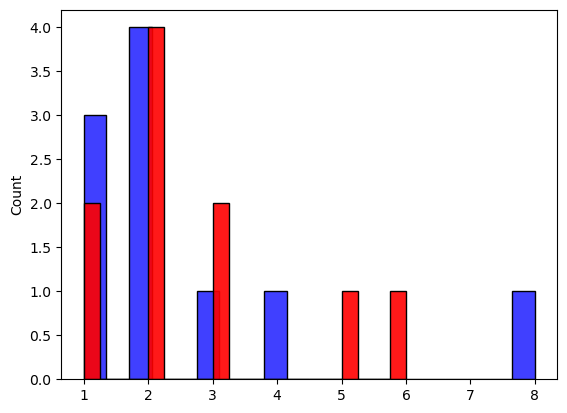

In [25]:
sns.histplot(list(PAGR_HAM['pos_Hamilton_6']), bins=20, color='b')
sns.histplot(list(PAGR['pos_Russell_10']), bins=20, color='r', alpha=0.9)
plt.show()

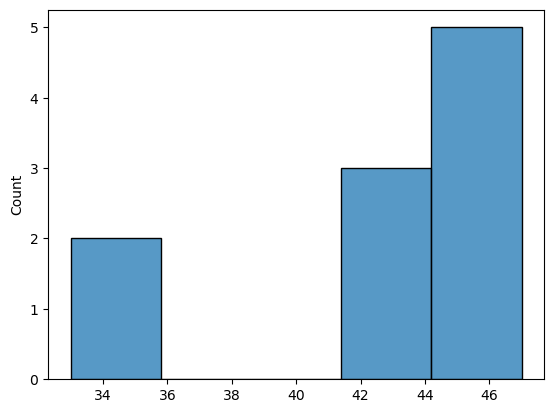

In [26]:
sns.histplot([33,47,47,42,35,43,47,44,47,47])
plt.show()